In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('BlackFriday.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


In [8]:
print('<Contain NaNs?>')
print(df.isnull().any())
missing_ser_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)
df.fillna(0,inplace=True)


<Contain NaNs?>
User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

<NaN ratio>
Product_Category_3    69.44
Product_Category_2    31.06
Name: missing values %, dtype: float64


In [9]:
for col in df.columns:
    print('{} unique element: {}'.format(col,df[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 18
Product_Category_3 unique element: 16
Purchase unique element: 17959


Text(0,0.5,'Count')

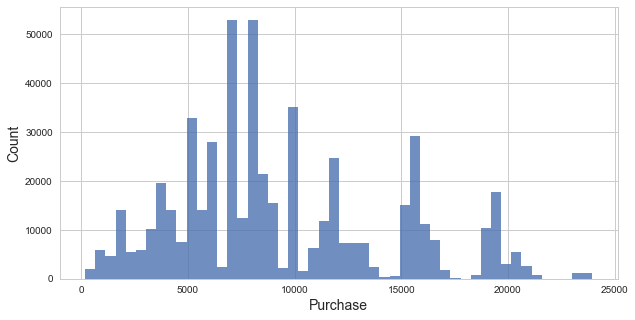

In [10]:
#EDA
plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

([], <a list of 0 Text xticklabel objects>)

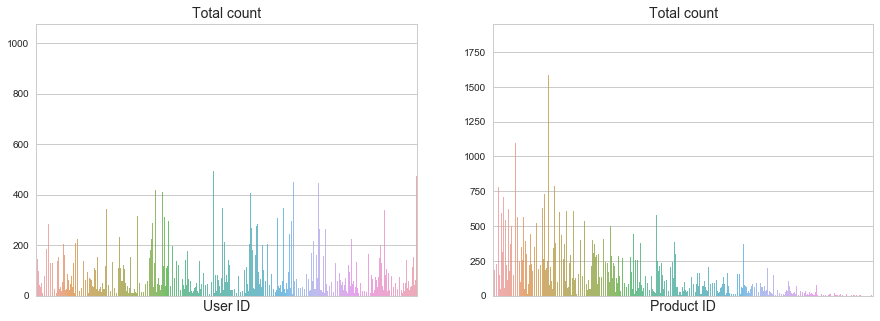

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot('User_ID',data=df,alpha = 0.8)
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])
plt.subplot(122)
sns.countplot('Product_ID',data=df,alpha = 0.8)
plt.xlabel('Product ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])

Text(0.5,1,'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

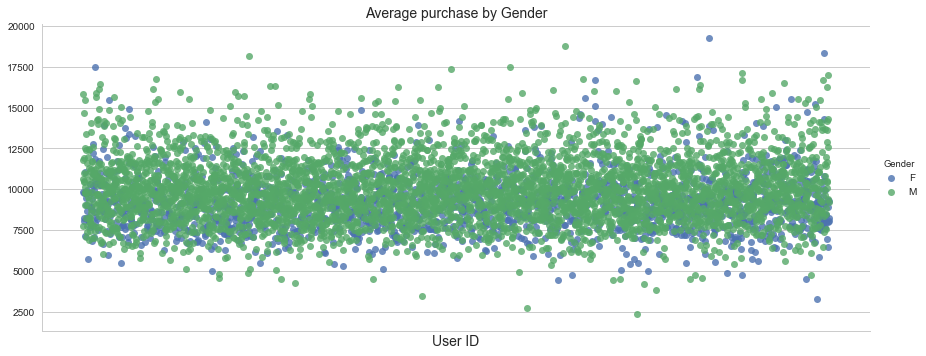

<Figure size 1440x360 with 0 Axes>

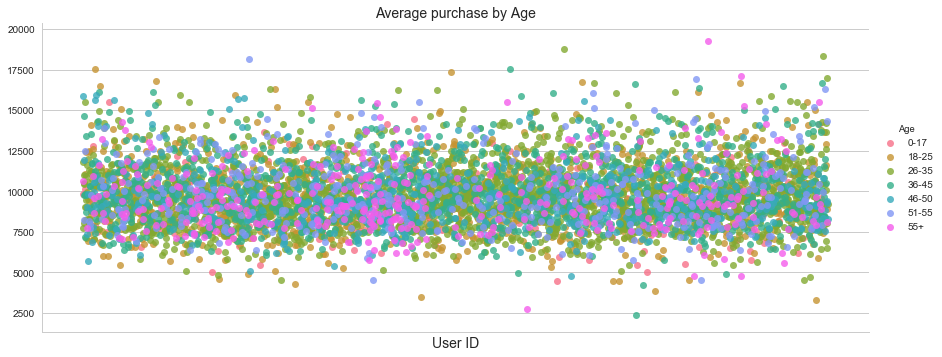

In [12]:
df_Apurchase_by_UID_Gender = df.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_UID_Age = df.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

Text(0.5,1,'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

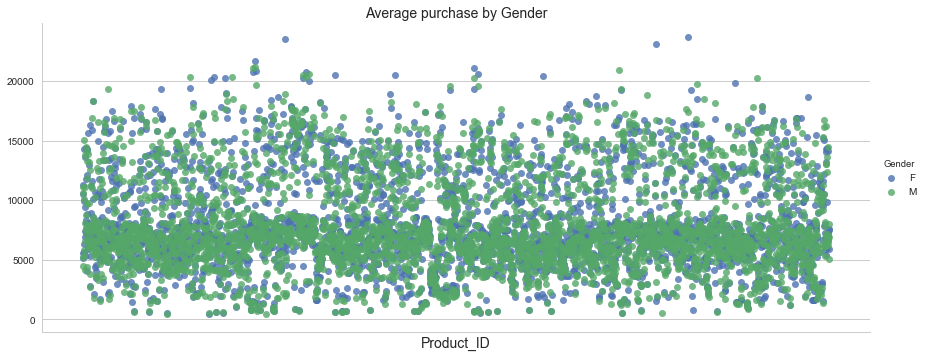

<Figure size 1440x360 with 0 Axes>

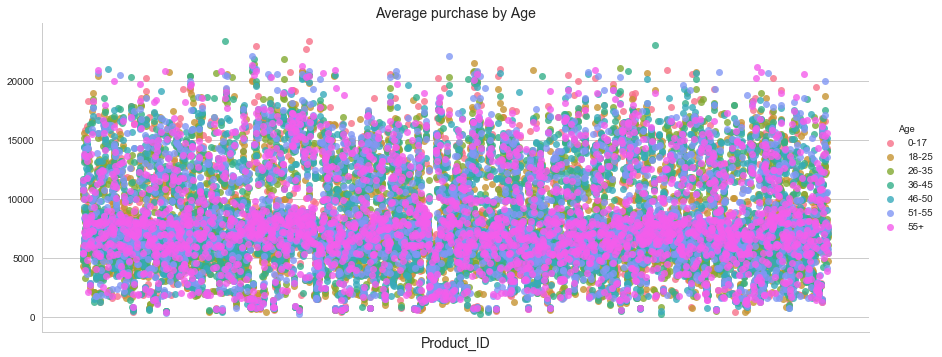

In [13]:
df_Apurchase_by_PID_Gender = df.groupby(['Product_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
le_P_ID = LabelEncoder()
df_Apurchase_by_PID_Gender['Product_ID'] = le_P_ID.fit_transform(df_Apurchase_by_PID_Gender['Product_ID'])
df_Apurchase_by_PID_Age = df.groupby(['Product_ID','Age']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_PID_Age['Product_ID'] = le_P_ID.fit_transform(df_Apurchase_by_PID_Age['Product_ID'])

plt.figure(figsize=(20,5))
sns.lmplot('Product_ID','Purchase',data=df_Apurchase_by_PID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('Product_ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('Product_ID','Purchase',data=df_Apurchase_by_PID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('Product_ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

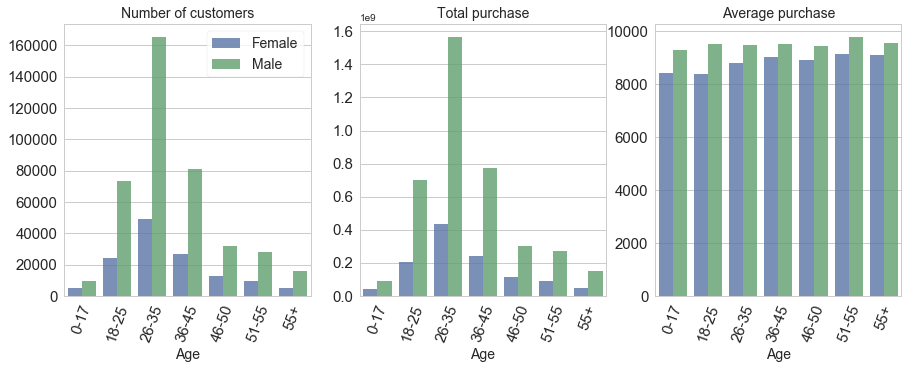

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('Age',order=age_order,hue='Gender',data=df,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(132)
df_Tpurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

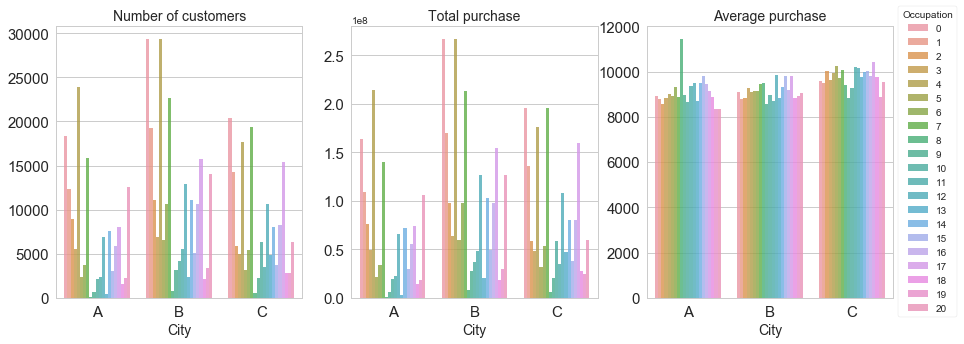

In [15]:
city_order = ['A','B','C']
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('City_Category',order=city_order,hue='Occupation',data=df,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.title('Number of customers',fontsize=14)
plt.subplot(132)
df_Tpurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Tpurchase_by_City,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Apurchase_by_City,alpha = 0.8)
plt.title('Average purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=15)


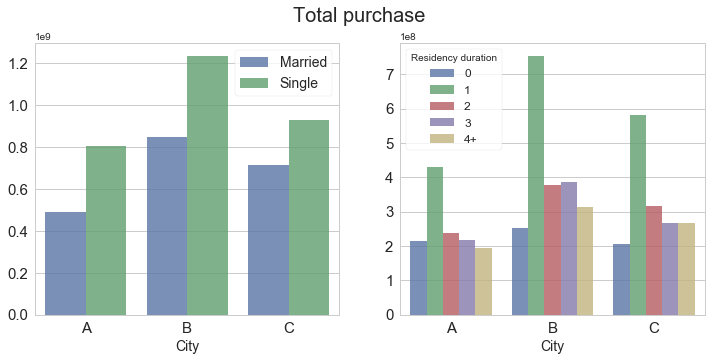

In [16]:
df['Marital_Status_label']=np.where(df['Marital_Status'] == 0,'Single','Married')
df_Tpurchase_by_City_Marital = df.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = df.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)
df.drop('Marital_Status_label',axis=1,inplace=True)

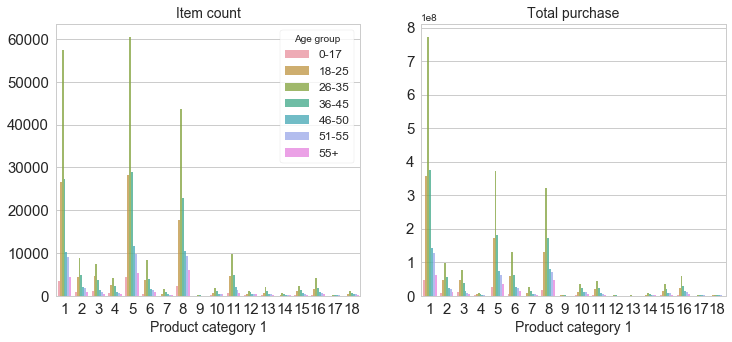

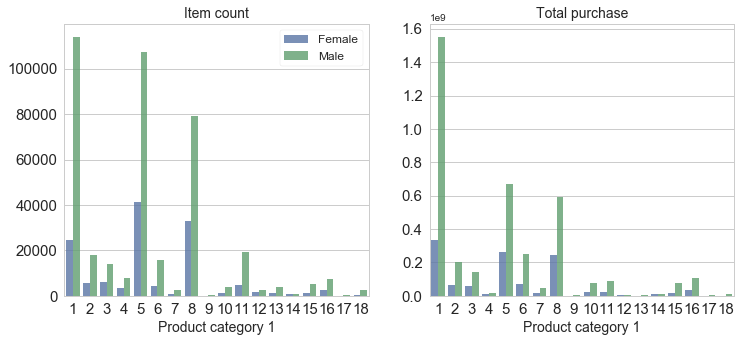

In [17]:
df_Tpurchase_by_PC1_Age = df.groupby(['Product_Category_1','Age']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Age',data=df,alpha = 0.8,hue_order=age_order)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Age',data=df_Tpurchase_by_PC1_Age,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

df_Tpurchase_by_PC1_Gender = df.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Gender',data=df,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_Tpurchase_by_PC1_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

In [20]:
le_U_ID = LabelEncoder()
df['User_ID'] = le_U_ID.fit_transform(df['User_ID'])
le_P_ID = LabelEncoder()
df['Product_ID'] = le_P_ID.fit_transform(df['Product_ID'])
df['Gender'] = np.where(df['Gender']=='M',1,0) # Female: 0, Male: 1
df_Age = pd.get_dummies(df.Age)
df_CC = pd.get_dummies(df.City_Category)
df_SIC = pd.get_dummies(df.Stay_In_Current_City_Years)
df_encoded = pd.concat([df,df_Age,df_CC,df_SIC],axis=1)
df_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)


C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [22]:
df_frac = df_encoded.sample(frac=0.02,random_state=100)
X = df_frac.drop(['Purchase'], axis=1)
y = df_frac['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best parameter: {'n_estimators': 300}
Best score: 2980.37


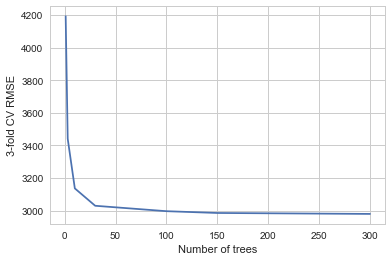

In [23]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)
plt.figure()
plt.plot(list(param_grid.values())[0],(-1*grid_rf.cv_results_['mean_test_score'])**0.5)
plt.xlabel('Number of trees')
plt.ylabel('3-fold CV RMSE')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

In [27]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)

In [28]:
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))


Best parameter: {'max_depth': 7, 'n_estimators': 300}
Best score: 2958.49


In [29]:
train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(max_depth=7, n_estimators=150), X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')

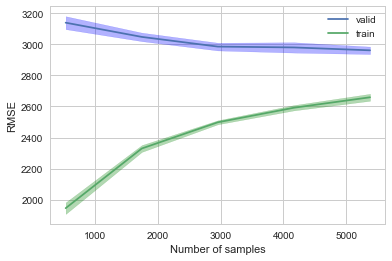

In [30]:
train_scores = (-1*train_scores)**0.5
valid_scores = (-1*valid_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()

Text(0.5,0,'relative importance')

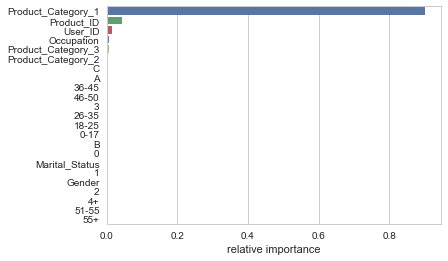

In [31]:
rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
f_im = rf.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

In [33]:
X = df_encoded.drop(['Purchase'], axis=1)
y = df_encoded['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
y_predicted = rf.predict(X_test_scaled)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_predicted)**0.5))

Test set RMSE: 2912.030


In [35]:
df_ocup = pd.get_dummies(df.Occupation)
df_encoded = pd.concat([df_encoded,df_ocup],axis=1)
df_encoded.drop(['Occupation'],axis=1,inplace=True)

KeyError: "['Occupation'] not found in axis"

In [38]:
df_frac = df_encoded.sample(frac=0.02,random_state=100)
X = df_frac.drop(['Purchase','User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'], axis=1)
y = df_frac['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

In [39]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train,y_train)

In [40]:
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 3, 'n_estimators': 300}
Best score: 4936.32


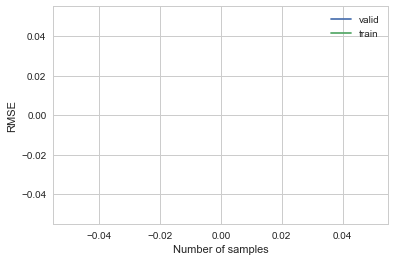

In [44]:
train_scores = (-1*train_scores)**0.5
valid_scores = (-1*valid_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()

Text(0.5,0,'relative importance')

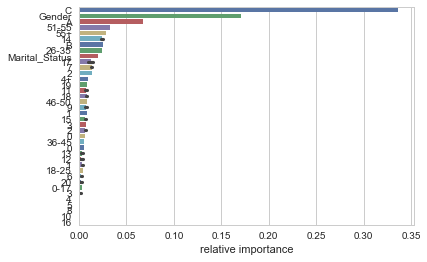

In [42]:
rf = RandomForestRegressor(max_depth=3, n_estimators=300).fit(X_train,y_train)
f_im = rf.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

In [43]:
y_predicted = rf.predict(X_test)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_predicted)**0.5))

Test set RMSE: 4875.067
